## Visualizing the distribution of a dataset

http://web.stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seborn for examining univariate and bivariate distributions. You may also want to look at the categorical plots chapter for examples of functions that make it easy to compare the distribution of a variable across levels of other variables.

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
sns.set(color_codes=True)

In [5]:
np.random.seed(sum(map(ord, "distributions")))

In [6]:
x = np.random.normal(size=100)


In [7]:
x

array([ 0.42852369,  1.19133255, -0.45820746, -1.85860798,  1.02445299,
        0.69330216,  0.78849804,  0.38978006,  0.28186484,  2.87595634,
       -0.47628215,  1.68025623, -0.39550873, -0.31309963, -1.08837344,
        1.35804163,  0.99799477, -1.56900497,  0.45547916, -1.21679124,
       -0.75801737, -0.07849588, -0.10971737,  0.81419187,  0.85226952,
        0.63110924, -0.00947497,  0.89289944,  1.38285579, -1.49399717,
        0.47088875, -0.01288971, -0.44335464,  2.14135081, -1.30731012,
        0.85712756, -1.33106341,  2.02990049,  0.4914988 ,  1.13272871,
        0.31018322, -0.68251238, -1.03515012,  0.92090423, -0.2528402 ,
        0.04264866,  0.12932479,  0.22791984,  0.27501328,  2.25623038,
        0.86225469,  0.83121643, -1.02652783, -0.57345982,  0.44343461,
       -0.23975428, -0.78221362,  0.9580867 ,  0.46108662, -0.03729805,
       -0.15460078,  0.68695857,  0.42026656, -0.19984644, -1.83236953,
       -0.6656998 , -1.31992855, -0.36497473,  0.17610984, -0.54

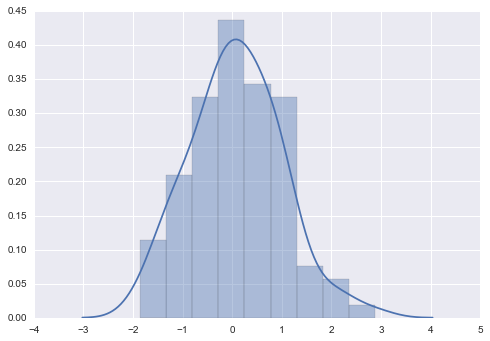

In [8]:
sns.distplot(x);

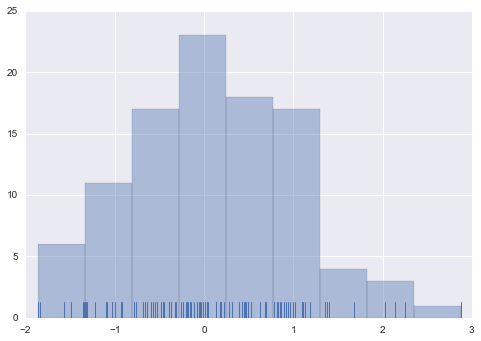

In [9]:
sns.distplot(x, kde=False, rug=True);

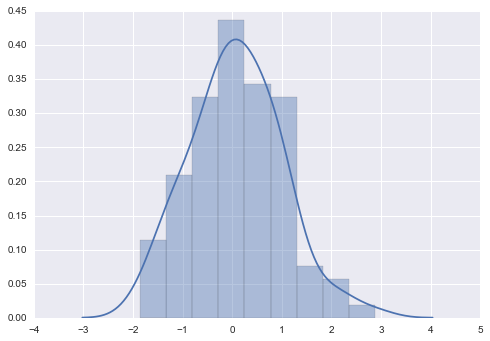

In [10]:
sns.distplot(x, kde=True, rug=False);

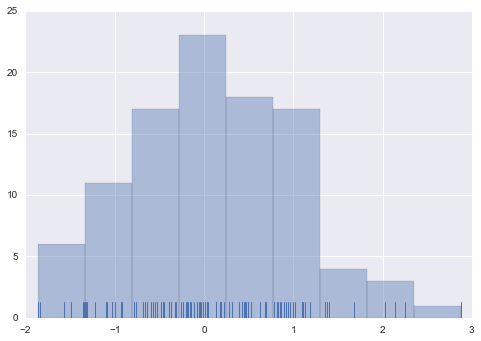

In [11]:
sns.distplot(x, kde=False, rug=True);

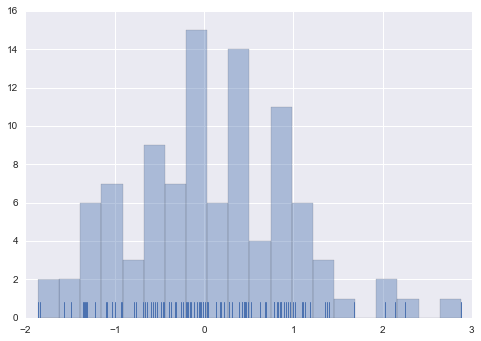

In [12]:
sns.distplot(x, bins=20, kde=False, rug=True);

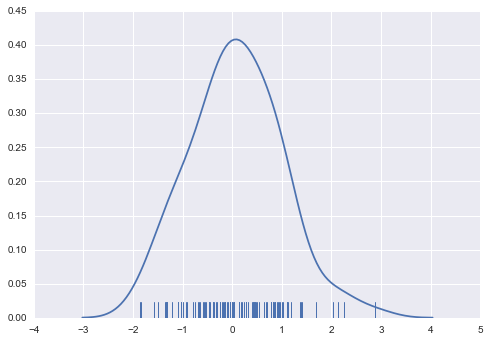

In [13]:
sns.distplot(x, hist=False, rug=True);

In [14]:
x = np.random.normal(0, 1, size=30)

In [15]:
x

array([ 0.7352826 ,  0.7171099 ,  0.96283844,  0.22137047, -0.07936705,
        2.35623791,  0.16982373, -1.65983154,  1.38854404, -1.56926211,
       -0.73055429, -0.60257736,  0.89826375,  0.78206761, -0.14125437,
       -0.44724594,  0.2919698 ,  0.42711494,  0.59431423,  0.1539176 ,
       -1.53200567, -0.56955878,  0.78831908,  0.28275372, -0.58649792,
       -1.16397748,  0.28894759, -0.2634361 , -1.50246105, -1.75745611])

In [16]:
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)

In [17]:
bandwidth

0.52268815484812281

In [18]:
support = np.linspace(-4, 4, 200)

In [19]:
support

array([-4.        , -3.95979899, -3.91959799, -3.87939698, -3.83919598,
       -3.79899497, -3.75879397, -3.71859296, -3.67839196, -3.63819095,
       -3.59798995, -3.55778894, -3.51758794, -3.47738693, -3.43718593,
       -3.39698492, -3.35678392, -3.31658291, -3.27638191, -3.2361809 ,
       -3.1959799 , -3.15577889, -3.11557789, -3.07537688, -3.03517588,
       -2.99497487, -2.95477387, -2.91457286, -2.87437186, -2.83417085,
       -2.79396985, -2.75376884, -2.71356784, -2.67336683, -2.63316583,
       -2.59296482, -2.55276382, -2.51256281, -2.47236181, -2.4321608 ,
       -2.3919598 , -2.35175879, -2.31155779, -2.27135678, -2.23115578,
       -2.19095477, -2.15075377, -2.11055276, -2.07035176, -2.03015075,
       -1.98994975, -1.94974874, -1.90954774, -1.86934673, -1.82914573,
       -1.78894472, -1.74874372, -1.70854271, -1.66834171, -1.6281407 ,
       -1.5879397 , -1.54773869, -1.50753769, -1.46733668, -1.42713568,
       -1.38693467, -1.34673367, -1.30653266, -1.26633166, -1.22

In [20]:
kernels = []

In [21]:
kernels

[]

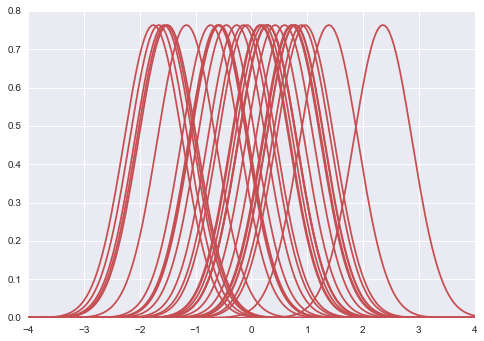

In [22]:
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

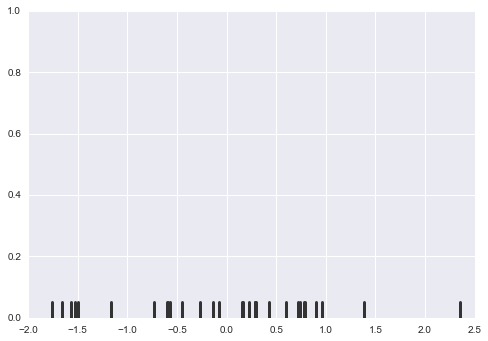

In [23]:
sns.rugplot(x, color=".2", linewidth=3);

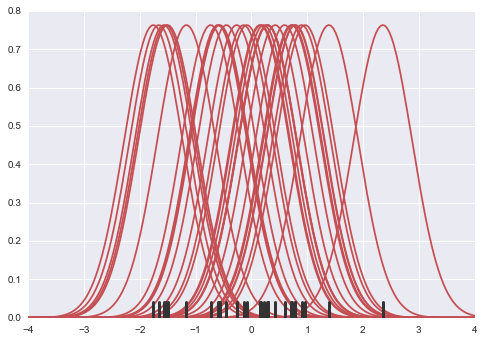

In [24]:
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

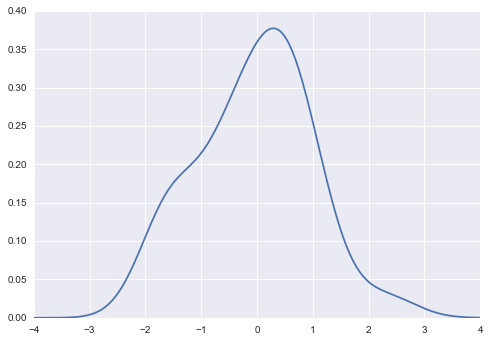

In [25]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

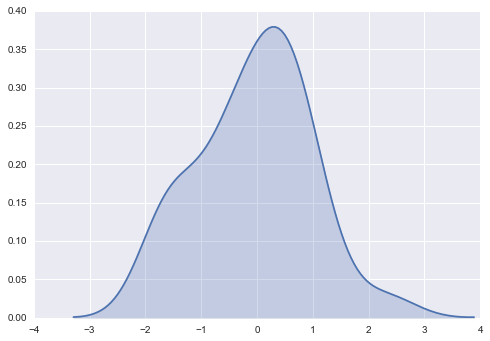

In [26]:
sns.kdeplot(x, shade=True);

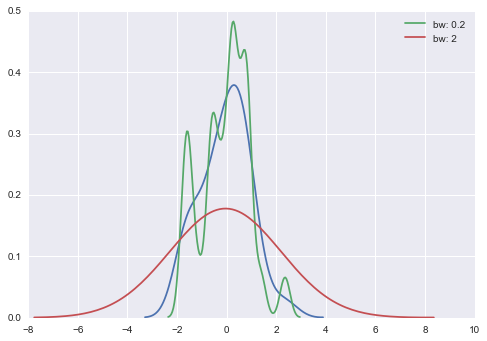

In [27]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

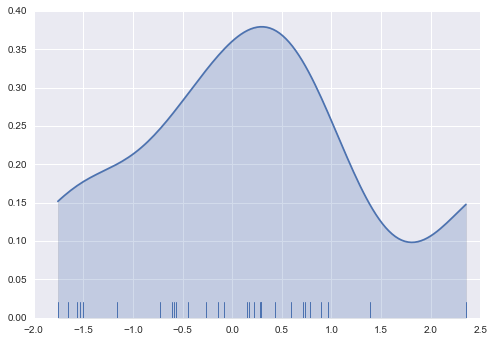

In [28]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

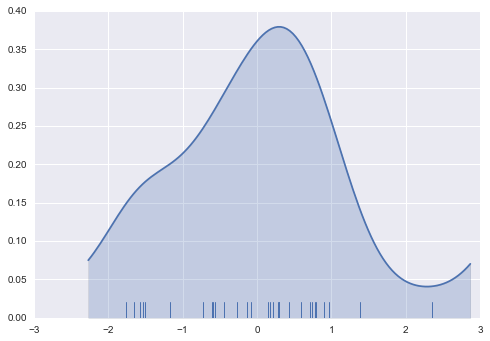

In [29]:
sns.kdeplot(x, shade=True, cut=1)
sns.rugplot(x);

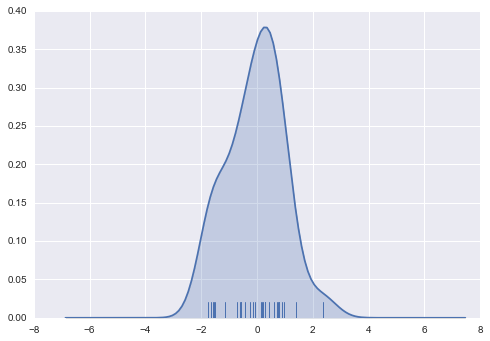

In [30]:
sns.kdeplot(x, shade=True, cut=10)
sns.rugplot(x);

# Fitting parametric distributions

In [31]:
x = np.random.gamma(6, size=200)
#sns.distplot(x, kde=False, fit=stats.gamma);

In [32]:
x

array([  2.99907362,   4.09313548,  12.12571198,   7.01256669,
         4.9557517 ,   4.05953038,   3.74197101,   6.82790648,
         6.23961483,   2.62931586,   5.05144745,   5.01772557,
         6.20751631,   4.07702762,  11.23941262,   3.971715  ,
         6.30727009,   6.60628601,   5.93604259,   3.66254408,
         9.01548014,   7.9995251 ,   6.27571208,   6.59253863,
         5.02382157,   2.49944156,   5.05324528,   7.12339718,
         2.80286283,   7.1520659 ,   6.72503671,   7.22150757,
         7.83375188,   3.25537349,  10.87087732,   5.61507973,
         8.09679917,   3.59759672,   9.66873549,   3.94310378,
         6.14644894,   4.61396081,   2.70858847,   4.7404292 ,
         5.63583857,   6.12379183,   3.94558998,   5.44674012,
         4.62825446,   6.84155672,   8.11696485,   4.76596201,
         7.54544976,   9.17533288,   1.81818774,  11.31200013,
         4.15554974,   3.1615185 ,   8.23974891,   6.29557631,
         4.07736663,   1.9071141 ,   6.22394495,   4.68

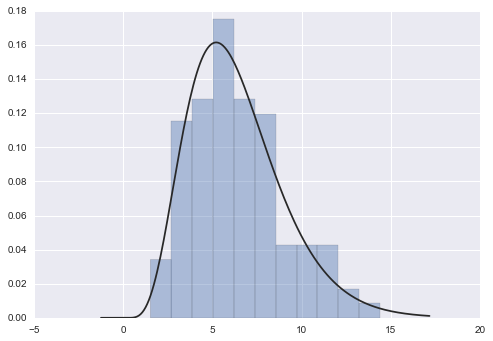

In [33]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

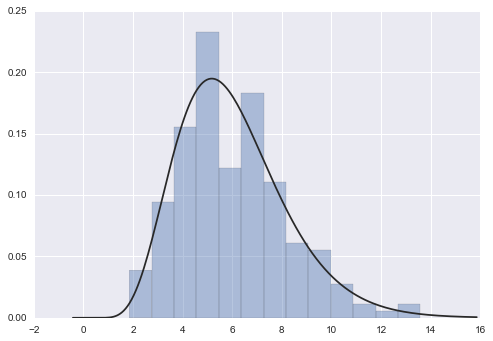

In [34]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

In [35]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]

In [36]:
mean

[0, 1]

In [37]:
cov

[(1, 0.5), (0.5, 1)]

In [38]:
data = np.random.multivariate_normal(mean, cov, 200)

In [39]:
data

array([[ -1.31067854e+00,   7.35115932e-01],
       [ -1.60311237e+00,  -8.00726909e-01],
       [ -2.02968820e-01,  -5.90721704e-01],
       [  2.04414598e-01,   1.07649469e+00],
       [ -6.97133774e-01,   5.35622283e-01],
       [ -9.60223964e-01,  -1.59431186e+00],
       [ -2.28124019e-01,   6.36413272e-01],
       [ -3.72067329e-01,   1.35274621e+00],
       [ -8.30994161e-01,   2.97116857e-01],
       [ -6.12970224e-01,   1.39359474e+00],
       [ -9.15974399e-01,  -8.25001899e-01],
       [ -2.23487904e-01,   1.02783060e+00],
       [  1.57809575e+00,   1.23697771e+00],
       [  4.39538179e-01,  -5.76338586e-01],
       [  1.72038900e+00,   2.88665678e+00],
       [  9.76352228e-01,   3.36393916e+00],
       [  9.19003954e-01,   1.31537966e+00],
       [  1.92663871e+00,   2.17449859e+00],
       [ -1.41908734e+00,  -1.17075211e-01],
       [  7.14670052e-01,   6.48660078e-01],
       [ -1.99837600e-01,   1.32122080e+00],
       [ -5.76780993e-01,   1.32500820e+00],
       [ -

In [40]:
df = pd.DataFrame(data, columns=["x", "y"])

In [41]:
df.head()

,x,y
0,-1.310679,0.735116
1,-1.603112,-0.800727
2,-0.202969,-0.590722
3,0.204415,1.076495
4,-0.697134,0.535622


In [42]:
df

,x,y
0,-1.310679,0.735116
1,-1.603112,-0.800727
2,-0.202969,-0.590722
3,0.204415,1.076495
4,-0.697134,0.535622
5,-0.960224,-1.594312
6,-0.228124,0.636413
7,-0.372067,1.352746
8,-0.830994,0.297117
9,-0.612970,1.393595


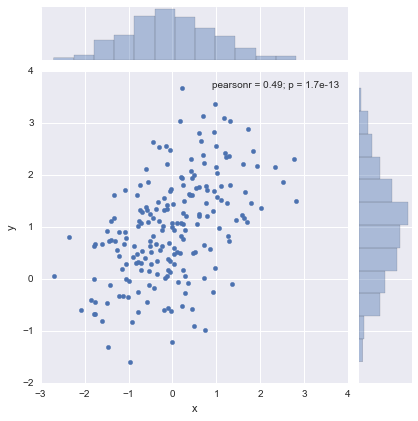

In [43]:
sns.jointplot(x="x", y="y", data=df);

In [44]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T

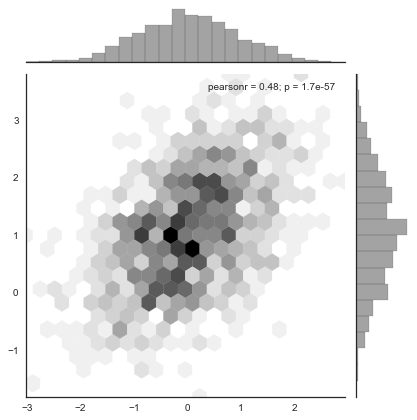

In [49]:
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

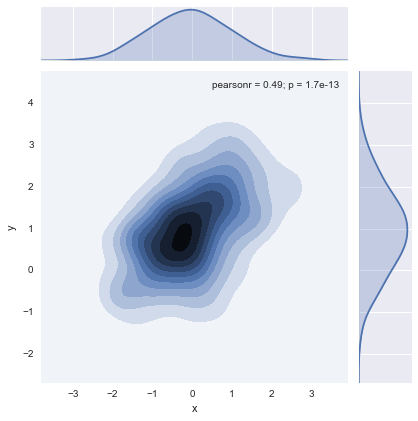

In [50]:
sns.jointplot(x="x", y="y", data=df, kind="kde");


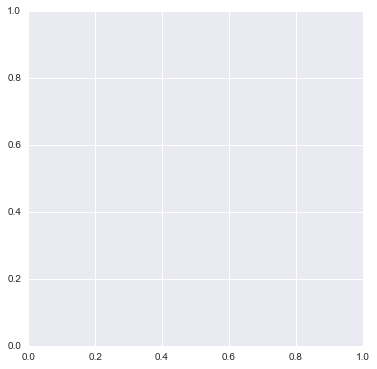

In [51]:
f, ax = plt.subplots(figsize=(6, 6))

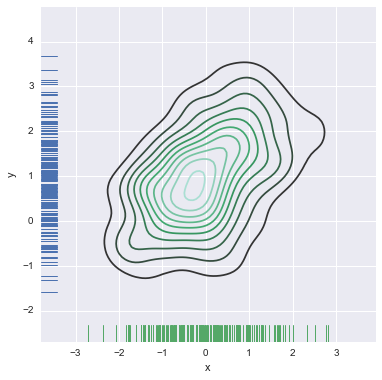

In [52]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

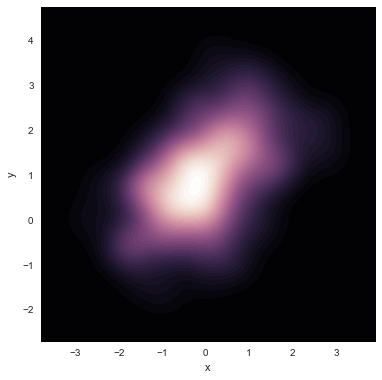

In [53]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

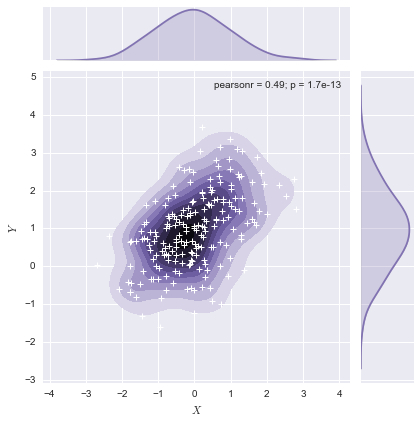

In [54]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

In [56]:
iris = sns.load_dataset("iris")


In [57]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


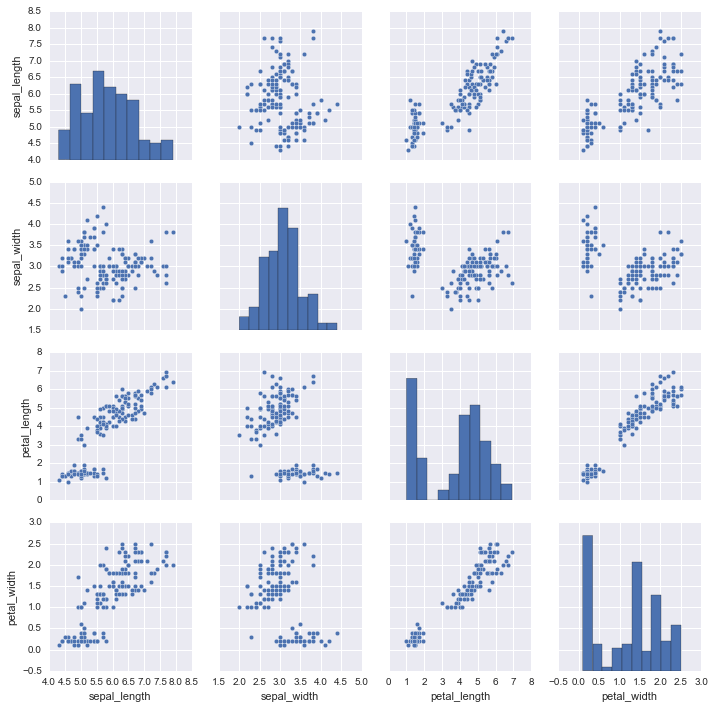

In [58]:
sns.pairplot(iris);

C:\Users\AlexMerhoom\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


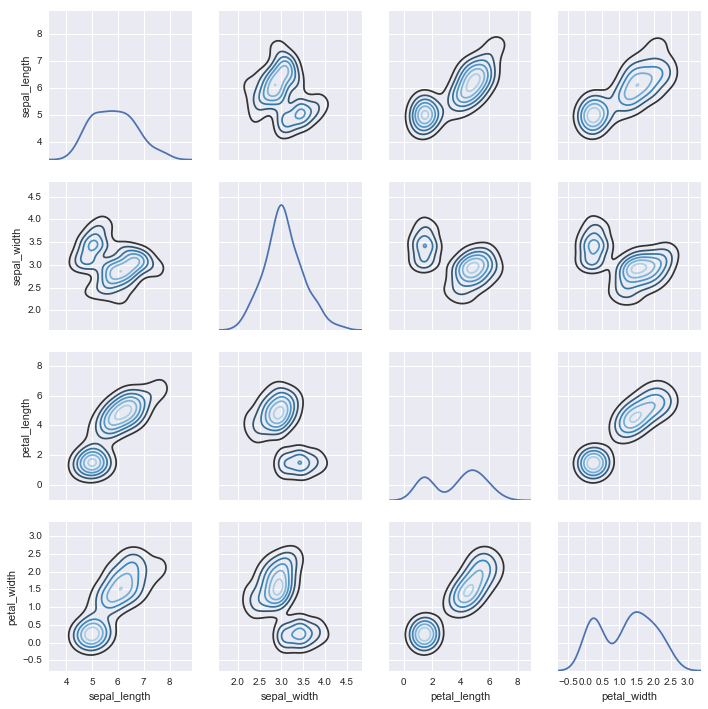

In [59]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

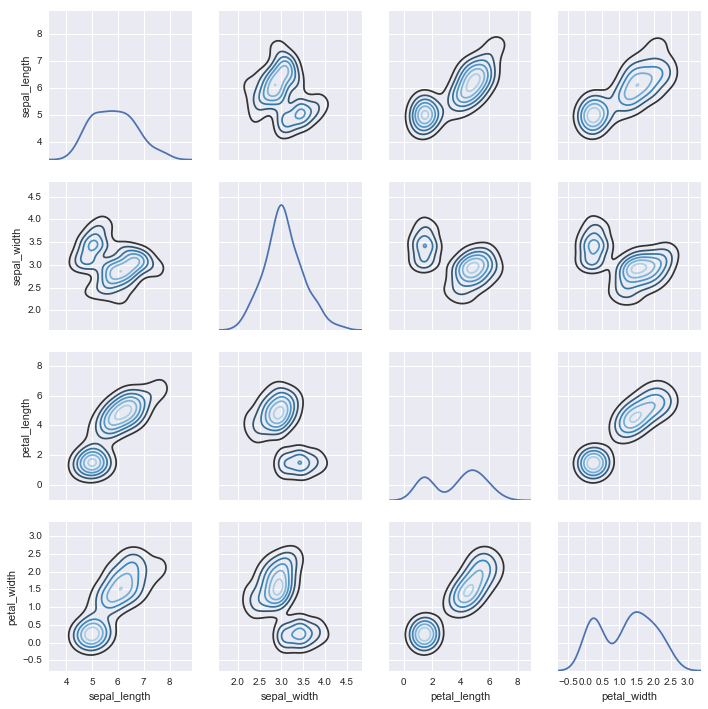

In [60]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

The end Jiahong Wang--- 23/03/2016